In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install keras==2.4.3
# !pip install tensorflow==2.4.1
# !pip install tensorflow-gpu==2.4.1
###################################
#!pip install -q keras
#!pip install --upgrade -q tensorflow

In [ ]:
import keras
import tensorflow

print(keras.__version__)
print(tensorflow.__version__)

2.4.3
2.4.1


In [ ]:
!pip3 install -q git+https://github.com/vasudevgupta7/gsoc-wav2vec2@main
!sudo apt-get install -y libsndfile1-dev
!pip3 install -q SoundFile
# !pip freeze >> requierements.txt


Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsndfile1-dev is already the newest version (1.0.28-4ubuntu0.18.04.2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [ ]:
# For Weights and Biases
!pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install bert-for-tf2 >> /dev/null
!pip install sentencepiece >> /dev/null
#!pip install git+https://github.com/KingsleyNA/NLP-on-a-ktrain
!pip install keras-self-attention
!pip install --upgrade grpcio >> /dev/null
!pip install tqdm  >> /dev/null
!pip install keras-multi-head


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
try:
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
import bert

In [ ]:
import os
import math
import datetime

from tqdm import tqdm

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras

import bert
from bert import BertModelLayer
from bert.loader import StockBertConfig, map_stock_config_to_params, load_stock_weights
from bert.tokenization.bert_tokenization import FullTokenizer

import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import rc

from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

In [ ]:
#import ktrain
#from ktrain import text as txt

import keras
import tensorflow

from keras_self_attention import SeqSelfAttention
from keras_multi_head import MultiHead

import numpy as np
import os
import sys

import wave
import copy
import math


from keras.models import Sequential, Model
from keras.layers.core import Dense, Activation
from keras.layers import GRU, LSTM, Input, Flatten, Concatenate, Embedding, Convolution1D, Dropout, Bidirectional, Conv2D, MaxPooling2D
from keras.layers.wrappers import TimeDistributed
from keras.layers.convolutional import Conv2D
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.layers import BatchNormalization
from sklearn.preprocessing import label_binarize
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing import sequence
from sklearn.preprocessing import LabelBinarizer
from keras.layers import *




import tensorflow as tf

#########################################speech
import os
import tensorflow as tf
import tensorflow_hub as hub
from wav2vec2 import Wav2Vec2Config
from wav2vec2 import CTCLoss
import soundfile as sf
from IPython.display import Audio
import random
import pandas as pd
import csv
import numpy as np

config = Wav2Vec2Config()
print("TF version:", tf.__version__)

# For MLOps
import wandb
print("W&B: ", wandb.__version__)
from wandb.keras import WandbCallback



TF version: 2.4.1
W&B:  0.12.17


In [ ]:
import wandb
from wandb.keras import WandbCallback

# Login to W&B
wandb.login()

wandb: Currently logged in as: ruddy. Use `wandb login --relogin` to force relogin


True

In [ ]:
%cd /content/drive/MyDrive/Colab_Notebooks/FINAL_THESIS_PROJECT/codes

/content/drive/MyDrive/Colab_Notebooks/FINAL_THESIS_PROJECT/codes


In [ ]:
from features import *
from helper import *

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID";
os.environ["CUDA_VISIBLE_DEVICES"]="0";

In [ ]:
code_path = "/content/drive/MyDrive/Colab_Notebooks/data"
emotions_used = np.array(['ang', 'exc', 'neu', 'sad'])
data_path = code_path + "/"
sessions = ['Session1', 'Session2', 'Session3', 'Session4', 'Session5']
framerate = 16000

In [ ]:
import pickle
with open(data_path + '/'+'data_collected.pickle', 'rb') as handle:
    data2 = pickle.load(handle)

# **Text_Phase**

In [ ]:
text = []

for ses_mod in data2:
    text.append(ses_mod['transcription'])

#-------------------------------------------
reviews = []

for i in text:
    reviews.append(i)
# print(reviews)    
print(len(reviews))

#--------------------------------------------
# for i in range(len(reviews)):
#   print(i, reviews[i])
#--------------------------------------------

text_Y = []
for ses_mod in data2:
    text_Y.append(ses_mod['emotion'])
    
#Y = label_binarize(Y,emotions_used)

# Y.shape
# type(Y)
text_Y[0], text_Y[1], text_Y[2], text_Y[3], text_Y[4]
print(len(text_Y))

#--------------------------------------------

# x_train = reviews[:3838]
# x_test = reviews[3838:]
# y_train = text_Y[:3838]
# y_test = text_Y[3838:]

# print(type(x_train))
# print(type(x_test))

4936
4936


# **Motion_Capture Phase**

In [ ]:
x_train_mocap = []
counter = 0
for ses_mod in data2:
    x_head = ses_mod['mocap_head']
    if(x_head.shape != (200,18)):
        x_head = np.zeros((200,18))   
    x_head[np.isnan(x_head)]=0
    x_hand = ses_mod['mocap_hand']
    if(x_hand.shape != (200,6)):
        x_hand = np.zeros((200,6))   
    x_hand[np.isnan(x_hand)]=0
    x_rot = ses_mod['mocap_rot']
    if(x_rot.shape != (200,165)):
        x_rot = np.zeros((200,165))   
    x_rot[np.isnan(x_rot)]=0
    x_mocap = np.concatenate((x_head, x_hand), axis=1)
    x_mocap = np.concatenate((x_mocap, x_rot), axis=1)
    x_train_mocap.append( x_mocap )
    
# x_train_mocap = np.array(x_train_mocap)
# x_train_mocap = x_train_mocap.reshape(-1,200,189,1)
# x_train_mocap.shape
# print(x_train_mocap[0])
print(len(x_train_mocap))

4936


# **Speech_wav2vec Phase**

In [ ]:
REQUIRED_SAMPLE_RATE = 16000
AUDIO_MAXLEN = 246000
# REAL_MAXLEN = 550000
LABEL_MAXLEN = 4
BATCH_SIZE = 2
LEARNING_RATE = 5e-5

In [ ]:
def read_txt_file(f):
  with open(f, "r") as f:
    samples = f.read().split("\n")
    samples = {s.split()[0]:" ".join(s.split()[1:]) for s in samples if len(s.split()) > 0}
    #print("\nSamples from ReadtextFile:", samples, "\n")
  return samples

def read_flac_file(file_path):
  with open(file_path, "rb") as f:
      audio, sample_rate = sf.read(f)
  if sample_rate != REQUIRED_SAMPLE_RATE:
      raise ValueError(
          f"sample rate (={sample_rate}) of your files must be {REQUIRED_SAMPLE_RATE}"
      )
  file_id = os.path.split(file_path)[-1][:-len(".wav")]
  return {file_id: audio}


def fetch_sound_text_mapping(data_dir):
  all_files = os.listdir(data_dir)

  flac_files = [os.path.join(data_dir, f) for f in all_files if f.endswith(".wav")]
  # print(len(flac_files))
  txt_files = [os.path.join(data_dir, f) for f in all_files if f.endswith(".txt")]
  # print(len(txt_files))

  flac_files.sort()

  txt_samples = {}
  for f in txt_files:
    txt_samples.update(read_txt_file(f))

  speech_samples = {}
  for f in flac_files:
    speech_samples.update(read_flac_file(f))

  #print("\n!!Samples from ReadtextFile:", txt_samples, "\n")
  #print("\n!!Samples from ReadtextFile:", speech_samples, "\n")

  assert len(txt_samples) == len(speech_samples)
  # print(len(txt_samples), len(speech_samples))

  samples = [(speech_samples[file_id], txt_samples[file_id]) for file_id in speech_samples.keys() if len(speech_samples[file_id]) < AUDIO_MAXLEN]
  not_samples = [(file_id, speech_samples[file_id], txt_samples[file_id]) for file_id in speech_samples.keys() if len(speech_samples[file_id]) > AUDIO_MAXLEN]
  
  return samples, not_samples


def reduce_mem_usage(df, int_cast=True, obj_to_category=False, subset=None):
    """
    Iterate through all the columns of a dataframe and modify the data type to reduce memory usage.
    :param df: dataframe to reduce (pd.DataFrame)
    :param int_cast: indicate if columns should be tried to be casted to int (bool)
    :param obj_to_category: convert non-datetime related objects to category dtype (bool)
    :param subset: subset of columns to analyse (list)
    :return: dataset with the column dtypes adjusted (pd.DataFrame)
    """
    start_mem = df.memory_usage().sum() / 1024 ** 2;
    gc.collect()
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    cols = subset if subset is not None else df.columns.tolist()

    for col in tqdm(cols):
        col_type = df[col].dtype

        if col_type != object and col_type.name != 'category' and 'datetime' not in col_type.name:
            c_min = df[col].min()
            c_max = df[col].max()

            # test if column can be converted to an integer
            treat_as_int = str(col_type)[:3] == 'int'
            if int_cast and not treat_as_int:
                treat_as_int = check_if_integer(df[col])

            if treat_as_int:
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        elif 'datetime' not in col_type.name and obj_to_category:
            df[col] = df[col].astype('category')
    gc.collect()
    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.3f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

    return df



In [ ]:

data_dir = "/content/drive/MyDrive/Colab_Notebooks/data/Fold_4936"
all_files = os.listdir(data_dir)

flac_files = [f for f in all_files if f.endswith(".wav")]
print(len(flac_files))
txt_files = [f for f in all_files if f.endswith(".txt")]
print(len(txt_files))



print("Transcription files:", txt_files, "\nSound files:", flac_files)

file_id = random.choice([f[:-len(".wav")] for f in flac_files])
# print(len(file_id))
flac_file_path, txt_file_path = os.path.join(data_dir, f"{file_id}.wav"), os.path.join(data_dir, "xbbx.txt")

print("Text Transcription:", read_txt_file(txt_file_path)[file_id], "\nAudio:")
Audio(filename=flac_file_path)

samples, not_samples = fetch_sound_text_mapping(data_dir)
print(len(samples))
print(len(not_samples))

4936
1
Transcription files: ['xbbx.txt'] 
Sound files: ['03730_File00_0000.wav', '03297_File00_0000.wav', '04148_File00_0000.wav', '03889_File00_0000.wav', '04461_File00_0000.wav', '03315_File00_0000.wav', '03918_File00_0000.wav', '04746_File00_0000.wav', '04157_File00_0000.wav', '03711_File00_0000.wav', '04129_File00_0000.wav', '03721_File00_0000.wav', '03415_File00_0000.wav', '03708_File00_0000.wav', '04448_File00_0000.wav', '04171_File00_0000.wav', '03318_File00_0000.wav', '04185_File00_0000.wav', '03911_File00_0000.wav', '03322_File00_0000.wav', '03411_File00_0000.wav', '04869_File00_0000.wav', '04115_File00_0000.wav', '04719_File00_0000.wav', '04102_File00_0000.wav', '03725_File00_0000.wav', '03305_File00_0000.wav', '03010_File00_0000.wav', '04116_File00_0000.wav', '03709_File00_0000.wav', '04096_File00_0000.wav', '03921_File00_0000.wav', '03726_File00_0000.wav', '04091_File00_0000.wav', '03293_File00_0000.wav', '03925_File00_0000.wav', '03009_File00_0000.wav', '04168_File00_0000.

In [ ]:
#len(samples[0][0])

hlong = 0

for i in range(len(samples)):
  a = len(samples[i][0])
  if a > hlong: hlong = a 

print("max vector length: ", hlong)

max vector length:  245599


In [ ]:
for i in range(len(samples)):
  if  len(samples[i][0]) > 246000:
    print(i, len(samples[i][0]))

In [ ]:
X = []
Y = []

for audio, label in samples:
  X.append(audio)
  Y.append(label)

print(type(X))
print(type(Y))
print(len(X))
print(len(Y))

<class 'list'>
<class 'list'>
4879
4879


In [ ]:
for i in range(len(X)): 
  gh = np.pad(X[i], (0, int(AUDIO_MAXLEN - len(X[i]))), mode = "constant")
  X[i] = gh

print(len(X[0]))
print(len(Y[0]))

246000
3


In [ ]:
X = np.array(X)

print(type(X))
print(type(X[0]))
print(X[0])
print()

#-----------------
YY = []

for i in Y:
   a = i[0] 
   YY.append(a)

Y = np.array(YY)

Y = np.array(Y)

#------------------
print(type(Y))
print(type(Y[0]))
print(Y[0])
print()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
[-0.0050354  -0.00497437 -0.0038147  ...  0.          0.
  0.        ]

<class 'numpy.ndarray'>
<class 'numpy.str_'>
n



In [ ]:
dfX = pd.DataFrame(X)
dfX

,0,1,2,3,4,5,6,7,8,9,...,245990,245991,245992,245993,245994,245995,245996,245997,245998,245999
0,-0.005035,-0.004974,-0.003815,-0.003265,-0.002594,-0.001617,-0.001434,-0.001526,-0.001190,-0.000488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000946,-0.000946,-0.000702,-0.000549,-0.002197,-0.002411,-0.001007,-0.000153,-0.000519,-0.000275,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.000366,-0.000153,0.000427,0.001282,0.001587,0.001099,0.000397,-0.000031,-0.000488,-0.000977,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.000854,-0.001251,-0.001678,-0.001465,-0.001678,-0.002045,-0.001465,-0.000702,-0.000549,-0.000549,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.013794,0.011810,0.006989,0.008942,0.016174,0.017517,0.012634,0.007080,0.005829,0.008514,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4874,-0.003052,-0.002502,-0.002563,-0.002960,-0.002625,-0.002350,-0.003082,-0.003235,-0.002747,-0.002686,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4875,0.004059,-0.004700,-0.020203,-0.025330,-0.000641,0.030701,0.028625,-0.000824,-0.016663,-0.006134,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4876,0.007538,0.007843,0.008331,0.011261,0.012634,0.014618,0.018005,0.019226,0.020874,0.024231,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4877,0.154572,0.163544,0.118622,0.026184,-0.204956,-0.380066,-0.308044,-0.214294,-0.292236,-0.314301,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
dfY = pd.DataFrame(Y)
dfY

,0
0,n
1,n
2,a
3,a
4,n
...,...
4874,n
4875,n
4876,n
4877,n


# **speech_training**

In [ ]:
# import numpy as np
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train = X[:3838]
X_test = X[3838:]
y_train = Y[:3838]
y_test = Y[3838:]


print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)


(3838, 246000)
(1041, 246000)
(3838,)
(1041,)


In [ ]:
# from tensorflow.keras.utils import to_categorical 

# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

# count_classes = y_test.shape[1]
# print(count_classes)

In [ ]:
no_list =[]
for i in range(len(not_samples)):
  #print(ccc[i][0][1:5])
  no_list.append(int(not_samples[i][0][1:5]))

#no_list

# **text_training**

In [ ]:
new_reviews = []
bad_reviews = []

#---------------------------------
for i in range(len(reviews)):
  if (i+1) not in no_list:
    new_reviews.append(reviews[i])
  else:
    bad_reviews.append(reviews[i])

#---------------------------------
print(len(new_reviews))
print(len(bad_reviews))

4879
57


In [ ]:
new_Y = []
bad_Y = []

#---------------------------------
for i in range(len(text_Y)):
  if (i+1) not in no_list:
    new_Y.append(text_Y[i])
  else:
    bad_Y.append(text_Y[i])
    
#---------------------------------
print(len(new_Y))
print(len(bad_Y))

4879
57


In [ ]:
x_train = new_reviews[:3838]
x_test = new_reviews[3838:]
y_train = new_Y[:3838]
y_test = new_Y[3838:]

print(type(x_train))
print(type(x_test))
print(len(x_test))
print(len(y_test))

<class 'list'>
<class 'list'>
1041
1041


In [ ]:
train = pd.DataFrame(
    {'review': x_train,
     'emotion': y_train
    })

test = pd.DataFrame(
    {'review': x_test,
     'emotion': y_test
    })

# train.head(2)
# train.tail(2)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


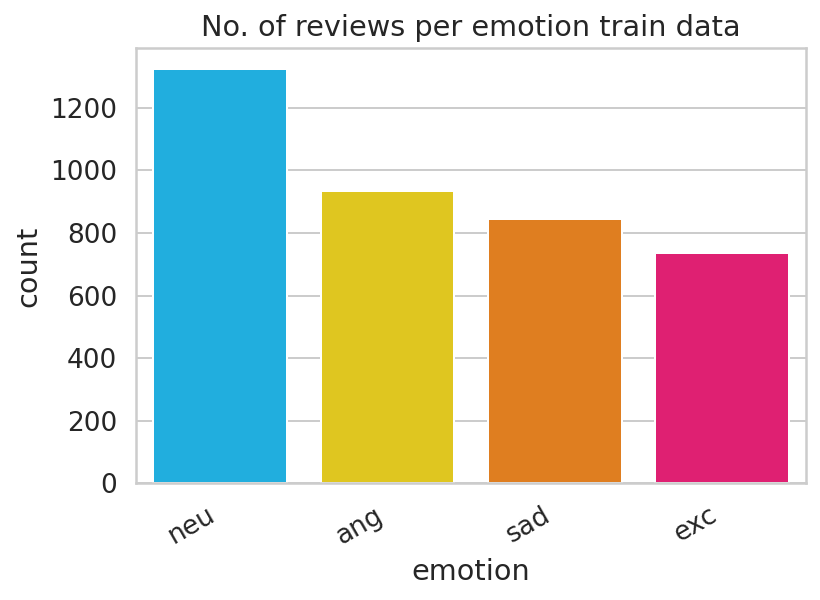

In [ ]:
chart = sns.countplot(train.emotion, palette=HAPPY_COLORS_PALETTE)
plt.title("No. of reviews per emotion train data")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


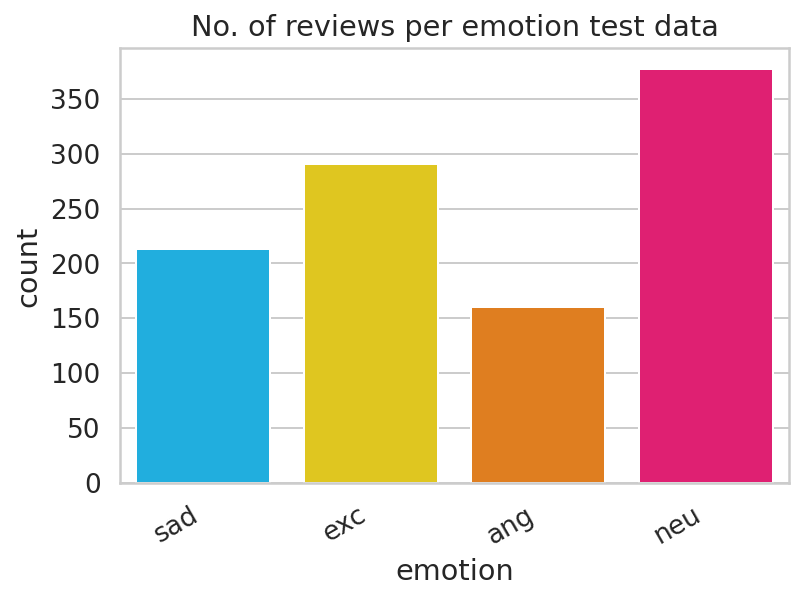

In [ ]:
chart = sns.countplot(test.emotion, palette=HAPPY_COLORS_PALETTE)
plt.title("No. of reviews per emotion test data")
chart.set_xticklabels(chart.get_xticklabels(), rotation=30, horizontalalignment='right');

In [ ]:
#!wget https://storage.googleapis.com/bert_models/2018_10_18/uncased_L-12_H-768_A-12.zip
#!unzip uncased_L-12_H-768_A-12.zip
#os.makedirs("model", exist_ok=True)
#!mv uncased_L-12_H-768_A-12/ model

In [ ]:
bert_model_name="uncased_L-12_H-768_A-12"

bert_ckpt_dir = os.path.join("model/", bert_model_name)
bert_ckpt_file = os.path.join(bert_ckpt_dir, "bert_model.ckpt")
bert_config_file = os.path.join(bert_ckpt_dir, "bert_config.json")


***Text_Preprocessing***:


In [ ]:
class IntentDetectionData:
  DATA_COLUMN = "review"
  LABEL_COLUMN = "emotion"

  def __init__(self, train, test, tokenizer: FullTokenizer, classes, max_seq_len=192):
    self.tokenizer = tokenizer
    self.max_seq_len = 0
    self.classes = classes
    
    ((self.train_x, self.train_y), (self.test_x, self.test_y)) = map(self._prepare, [train, test])

    print("max seq_len", self.max_seq_len)
    self.max_seq_len = min(self.max_seq_len, max_seq_len)
    self.train_x, self.test_x = map(self._pad, [self.train_x, self.test_x])

  def _prepare(self, df):
    x, y = [], []
    
    for _, row in tqdm(df.iterrows()):
      text, label = row[IntentDetectionData.DATA_COLUMN], row[IntentDetectionData.LABEL_COLUMN]
      tokens = self.tokenizer.tokenize(text)
      tokens = ["[CLS]"] + tokens + ["[SEP]"]
      token_ids = self.tokenizer.convert_tokens_to_ids(tokens)
      self.max_seq_len = max(self.max_seq_len, len(token_ids))
      x.append(token_ids)
      y.append(self.classes.index(label))

    return np.array(x), np.array(y)

  def _pad(self, ids):
    x = []
    for input_ids in ids:
      input_ids = input_ids[:min(len(input_ids), self.max_seq_len - 2)]
      input_ids = input_ids + [0] * (self.max_seq_len - len(input_ids))
      x.append(np.array(input_ids))
    return np.array(x)

In [ ]:
tokenizer = FullTokenizer(vocab_file=os.path.join(bert_ckpt_dir, "vocab.txt"))
tokenizer.tokenize("I can't wait to visit Bulgaria again!")

['i', 'can', "'", 't', 'wait', 'to', 'visit', 'bulgaria', 'again', '!']

In [ ]:
tokens = tokenizer.tokenize("I can't wait to visit Bulgaria again!")
tokenizer.convert_tokens_to_ids(tokens)

[1045, 2064, 1005, 1056, 3524, 2000, 3942, 8063, 2153, 999]

# **Mocap**

In [ ]:
new_x_train_mocap = []
bad_x_train_mocap = []

#------------------------------
for i in range(len(x_train_mocap)):
  if (i+1) not in no_list:
    new_x_train_mocap.append(x_train_mocap[i])
  else:
    bad_x_train_mocap.append(x_train_mocap[i])

#------------------------------
print(len(new_x_train_mocap))
print(len(bad_x_train_mocap))

4879
57


In [ ]:
new_x_train_mocap = np.array(new_x_train_mocap)
new_x_train_mocap = new_x_train_mocap.reshape(-1,200,189,1)
new_x_train_mocap.shape
# print(new_x_train_mocap[0])
print(len(new_x_train_mocap))

4879


In [ ]:
xtrain_mo = new_x_train_mocap[:3838]
xtest_mo = new_x_train_mocap[3838:]
print(xtrain_mo.shape)
print(xtest_mo.shape)

(3838, 200, 189, 1)
(1041, 200, 189, 1)


#**Combined (Text, Speech, Mocap)**

# **1**

In [ ]:
pretrained_layer = hub.KerasLayer("https://tfhub.dev/vasudevgupta7/wav2vec2/1", trainable=True)


def create_model(max_seq_len, bert_ckpt_file):

  with tf.io.gfile.GFile(bert_config_file, "r") as reader:
      bc = StockBertConfig.from_json_string(reader.read())
      bert_params = map_stock_config_to_params(bc)
      bert_params.adapter_size = None
      bert = BertModelLayer.from_params(bert_params, name="bert")
        
  input_ids = keras.layers.Input(shape=(max_seq_len, ), dtype='int32', name="input_ids")
  bert_output = bert(input_ids)

  print("bert shape", bert_output.shape)

  cls_out = keras.layers.Lambda(lambda seq: seq[:, 0, :])(bert_output)
  cls_out = keras.layers.Dropout(0.5)(cls_out)
  logits = keras.layers.Dense(units=128, activation="relu")(cls_out)
  logits = keras.layers.Dropout(0.5)(logits)
  #logits = keras.layers.Dense(units=len(classes), activation="softmax")(logits)

  model = keras.Model(inputs=input_ids, outputs=logits) # BERT model created
  model.summary()
  


  # Wav2vec_Speech model
  speech_inputs = tf.keras.Input(shape=(AUDIO_MAXLEN,))
  hidden_states = pretrained_layer(speech_inputs)


  hidden_states = tf.keras.layers.Flatten()(hidden_states)

  # den1 = tf.keras.layers.Dense(16, activation="relu")(hidden_states)
  # den1 = tf.keras.layers.Dropout(0.3)(den1)
  # den2 = tf.keras.layers.Dense(128, activation="relu")(den1)
  # den2 = tf.keras.layers.Dropout(0.3)(den2)
  
  speech_outputs = tf.keras.layers.Dense(128)(hidden_states)

  model_speech = Model(speech_inputs, speech_outputs) # Speech model created
  model_speech.summary()
  
  

  #model_mocap = Sequential()
  mocap_inputs = Input(shape=(200, 189, 1))
  model_mocap = Conv2D(16, 3, strides=(2, 2), padding='same') (mocap_inputs)
  model_mocap = Activation('relu')(model_mocap)
  model_mocap = Conv2D(32, 3, strides=(2, 2), padding='same')(model_mocap)
  model_mocap = Activation('relu')(model_mocap)
  model_mocap = Conv2D(64, 3, strides=(2, 2), padding='same')(model_mocap)
  model_mocap = Activation('relu')(model_mocap)
  model_mocap = Conv2D(75, 3, strides=(2, 2), padding='same')(model_mocap)
  model_mocap = Activation('relu')(model_mocap)
  model_mocap = Flatten()(model_mocap)
  mocap_outputs = Dense(128)(model_mocap)

  model_mocap = Model(mocap_inputs, mocap_outputs)
  model_mocap.summary()
    
  
  
  # Concatenation
  
  concatenated = concatenate([logits, speech_outputs, mocap_outputs])
  out = Dense(128, activation='relu')(concatenated)
  out = Dense(4, activation='softmax', name='output_layer')(out)

  merged_model5 = Model([input_ids, speech_inputs, mocap_inputs], out)
  merged_model5.summary()
  

  model.build(input_shape=(None, max_seq_len))
  load_stock_weights(bert, bert_ckpt_file)
  #merged_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
  
        
  return merged_model5

In [ ]:
classes = train.emotion.unique().tolist()

data = IntentDetectionData(train, test, tokenizer, classes, max_seq_len=128)

3838it [00:00, 4054.64it/s]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
1041it [00:00, 3995.57it/s]


max seq_len 88


In [ ]:
data.train_x.shape
data.test_x.shape

(1041, 88)

In [ ]:
data.train_x[0]
data.test_x[0]

array([ 101, 1045, 3305, 1012, 1045, 1005, 1049, 5191, 2055, 2017, 1012,
       1045, 2123, 1005, 1056, 2113, 2054, 1005, 1055, 2183, 2000, 4148,
       2000, 2017, 1012,  102,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0])

In [ ]:
data.train_y[0]

0

In [ ]:
data.max_seq_len

88

In [ ]:
model = create_model(data.max_seq_len, bert_ckpt_file)

bert shape (None, 88, 768)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_ids (InputLayer)       [(None, 88)]              0         
_________________________________________________________________
bert (BertModelLayer)        (None, 88, 768)           108890112 
_________________________________________________________________
lambda (Lambda)              (None, 768)               0         
_________________________________________________________________
dropout (Dropout)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               98432     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
Total params: 108,988,544
Trainable params: 108,988,544
Non-trainable params: 0
____________________

In [ ]:
# model.compile(
#   optimizer=keras.optimizers.Adam(1e-5),
#   loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#   metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")]
# )

In [ ]:
#  "loss_function": "sparse_categorical_crossentropy(from_logits=True)",
#  "metrics": [keras.metrics.SparseCategoricalAccuracy(name="acc")]

# Initialize wandb with project
run = wandb.init(project ='Multi-SER_Concat_2', 
                 config={ #. include hyperparmeters and metadat
                         "learning_rate": 1e-5,
                         "epochs": 100,
                         "batch_size": 5,
                         "loss_fn": "sparse_categorical_crossentropy",
                         "architecture": "Concat_Transformers",
                         "dataset": "IEMOCAP",
                         "metrics":  ["acc"]                         
}) 

config = wandb.config  # We'll use this to configure our experiment

In [ ]:
optimizer=keras.optimizers.Adam(config.learning_rate)
model.compile(optimizer, config.loss_fn, 
              config.metrics)

In [ ]:
# log_dir = "log/intent_detection/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%s")
# tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir)

history = model.fit(x=[data.train_x, X_train, xtrain_mo], y=data.train_y,
                    validation_data=([data.test_x, X_test, xtest_mo], data.test_y),
                    batch_size=config.batch_size,
                    shuffle=True,
                    epochs=config.epochs,
                    callbacks=[WandbCallback()]
                  )

wandb: WARNING The save_model argument by default saves the model in the HDF5 format that cannot save custom objects like subclassed models and custom layers. This behavior will be deprecated in a future release in favor of the SavedModel format. Meanwhile, the HDF5 model is saved as W&B files and the SavedModel as W&B Artifacts.


Epoch 1/100


768/768 [==============================] - 806s 1s/step - loss: 1.4522 - acc: 0.4393 - val_loss: 0.9244 - val_acc: 0.5821
Epoch 2/100
768/768 [==============================] - 771s 1s/step - loss: 0.7787 - acc: 0.6801 - val_loss: 0.7092 - val_acc: 0.7349
Epoch 3/100
768/768 [==============================] - 771s 1s/step - loss: 0.4259 - acc: 0.8365 - val_loss: 0.8427 - val_acc: 0.7051
Epoch 4/100
768/768 [==============================] - 771s 1s/step - loss: 0.2290 - acc: 0.9201 - val_loss: 0.7627 - val_acc: 0.7147
Epoch 5/100
768/768 [==============================] - 772s 1s/step - loss: 0.1489 - acc: 0.9480 - val_loss: 0.7189 - val_acc: 0.7464
Epoch 6/100
768/768 [==============================] - 772s 1s/step - loss: 0.0875 - acc: 0.9758 - val_loss: 0.7143 - val_acc: 0.7541
Epoch 7/100
768/768 [==============================] - 772s 1s/step - loss: 0.0467 - acc: 0.9885 - val_loss: 0.7509 - val_acc: 0.7464
Epoch 8/100
768/768 [==============================] - 772s 1s/step - loss

#**Evaluation**

In [ ]:
# %load_ext tensorboard

In [ ]:
# %tensorboard --logdir log/intent_detection/

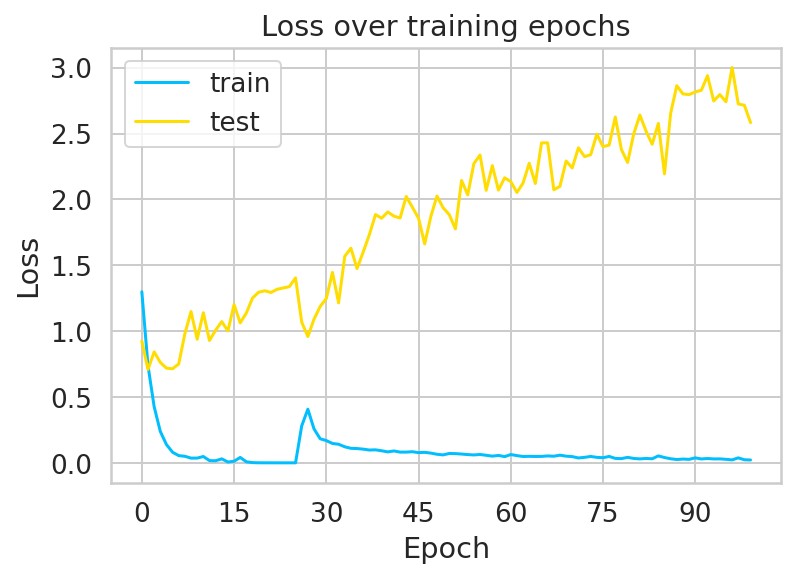

In [ ]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['loss'])
ax.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Loss over training epochs')
plt.show();

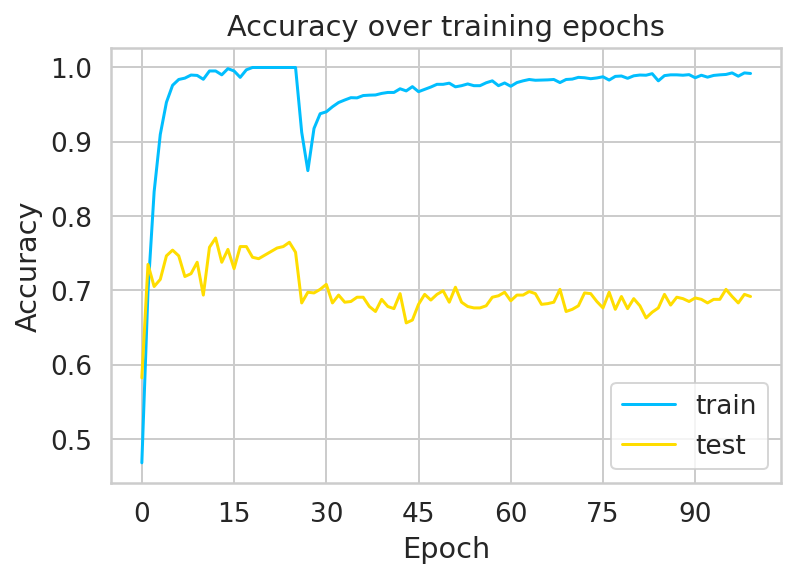

In [ ]:
ax = plt.figure().gca()
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

ax.plot(history.history['acc'])
ax.plot(history.history['val_acc'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'])
plt.title('Accuracy over training epochs')
plt.show();

In [ ]:
train_acc = model.evaluate([data.train_x, X_train, xtrain_mo], data.train_y)
test_acc = model.evaluate([data.test_x, X_test, xtest_mo], data.test_y)

print("train acc", train_acc)
print("test acc", test_acc)

33/33 [==============================] - 55s 2s/step - loss: 2.5832 - acc: 0.6916
train acc [0.016171347349882126, 0.9950494766235352]
test acc [2.583225965499878, 0.6916426420211792]


In [ ]:
y_pred = model.predict([data.test_x, X_test, xtest_mo]).argmax(axis=-1)

In [ ]:
print(classification_report(data.test_y, y_pred, target_names=classes))

In [ ]:
cm = confusion_matrix(data.test_y, y_pred)
df_cm = pd.DataFrame(cm, index=classes, columns=classes)
#print(cm) 
#print(df_cm)

# Normalize CM
norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#print(norm_cm)

df_norm_cm = pd.DataFrame(norm_cm, index=classes, columns=classes)
#print(df_norm_cm)

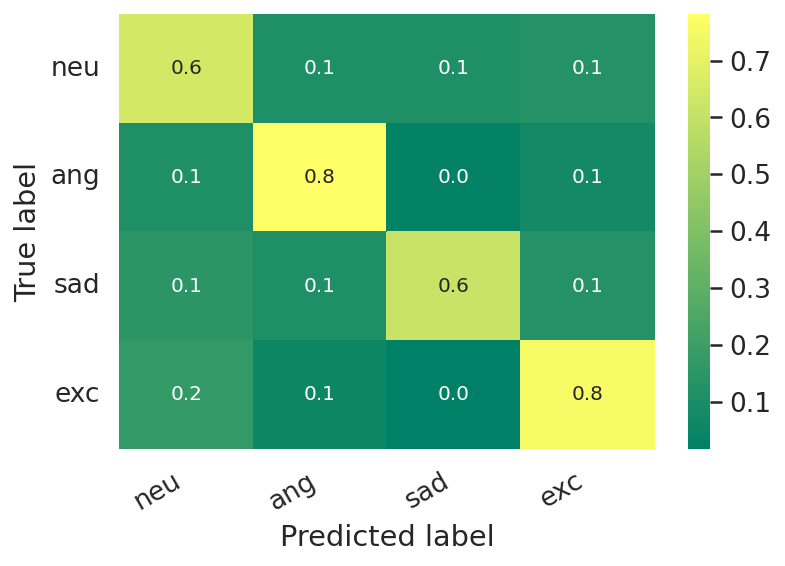

In [ ]:
hmap = sns.heatmap(df_norm_cm, annot=True, fmt="0.1f", cmap="summer")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
plt.ylabel('True label')
plt.xlabel('Predicted label');

In [ ]:
sentences = [
  "What's your age?",
  "you are an awful individual"
]

pred_tokens = map(tokenizer.tokenize, sentences)
pred_tokens = map(lambda tok: ["[CLS]"] + tok + ["[SEP]"], pred_tokens)
pred_token_ids = list(map(tokenizer.convert_tokens_to_ids, pred_tokens))

pred_token_ids = map(lambda tids: tids +[0]*(data.max_seq_len-len(tids)),pred_token_ids)
pred_token_ids = np.array(list(pred_token_ids))

predictions = model.predict([data.test_x, X_test, xtest_mo]).argmax(axis=-1)

for text, label in zip(sentences, predictions):
  print("text:", text, "\nintent:", classes[label])
  print()

text: What's your age? 
intent: sad

text: you are an awful individual 
intent: neu

